referencia recomendada:
https://www.youtube.com/watch?v=2pWv7GOvuf0&t=130s

# Reinforcement Learning

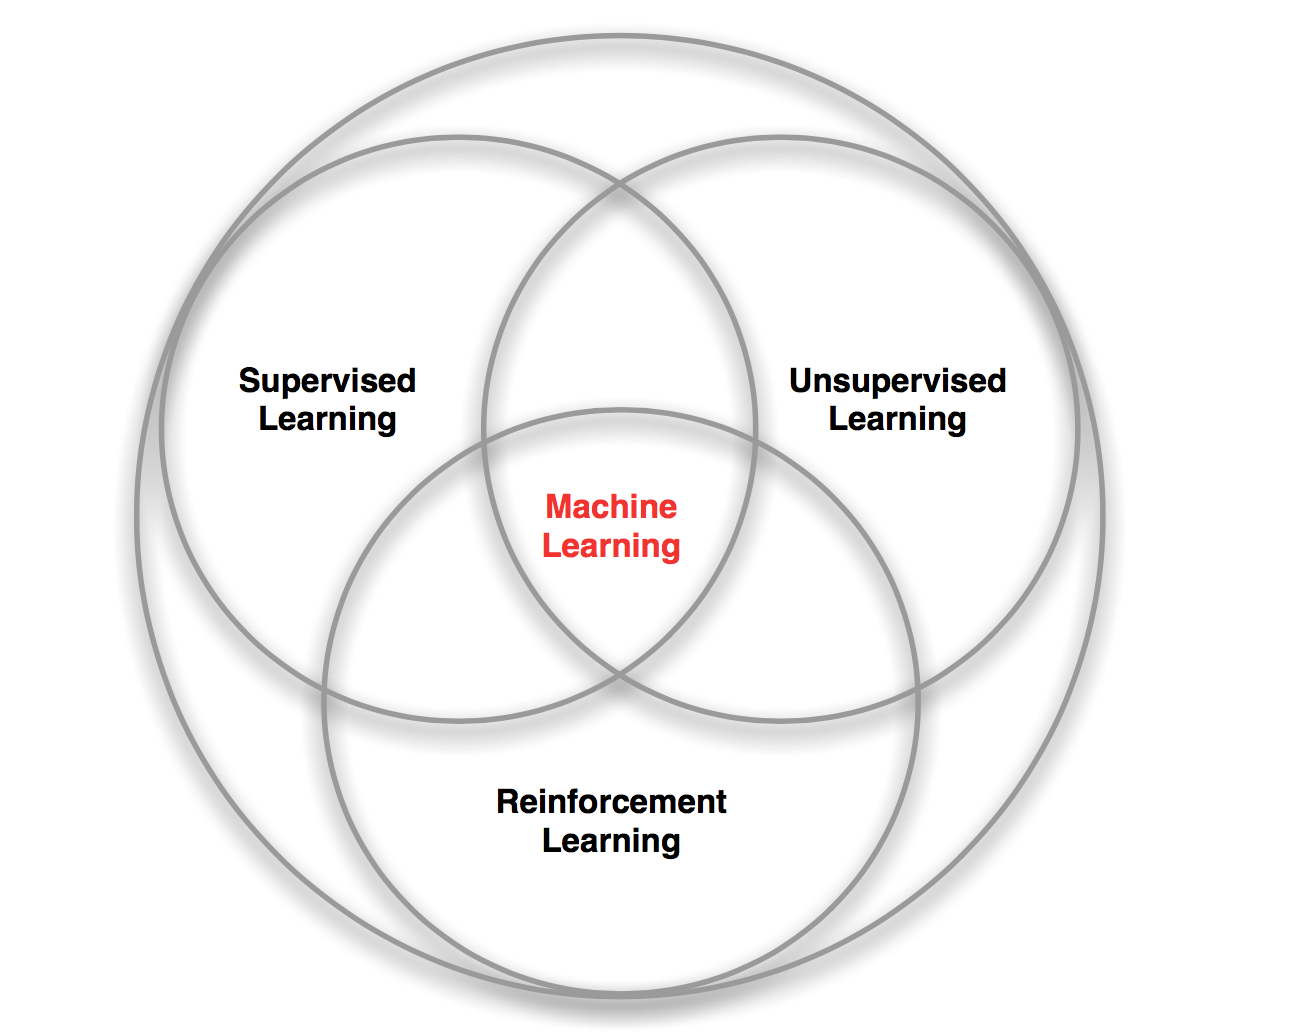

- No hay supervisión, la realimentación está basada en una recompenza (**Reward**)
- La realimentación puede estar atrasada en el tiempo (Instant reward, time delayed reward, **discount factor**)
- **No** son secuencias I.I.D como en muchos modelos de aprendisaje supervisado (Secuencia correlacionada)
- Un **Agente** que toma acciones y los resultados dependen directamente de ellas

# Ejemplos:

- Mañobrar un Drone
- Jugar al Backgammon
- Administrar un portfolio de inversión
- Lograr que un robot camine
- Jugar juegos de Atari

¿Cual es la recompenza en cada casa? ¿Esta atrasada en el tiempo?

# Recompenza (Reward) $R_t$

- Es un escalar
- Indica que tan bien el agente lo esta haciendo en el tiempo t

# Objetivo: Tomar las acciones que maximizen la recompenza acumulada

- Las acciones pueden tener consecuencias a largo plazo
- La recompenza puede estar retrasada en el tiempo
- Puede ser importante rechazar recompenza inmediata para tener recompenzas mayores al largo plazo

Ejemplo:
- Una inversión financiera puede tardar meses en hacerse efectiva
- En ajedrez bloquear al oponente puede ser una estrategia mejor que comer una pieza

# Modelo

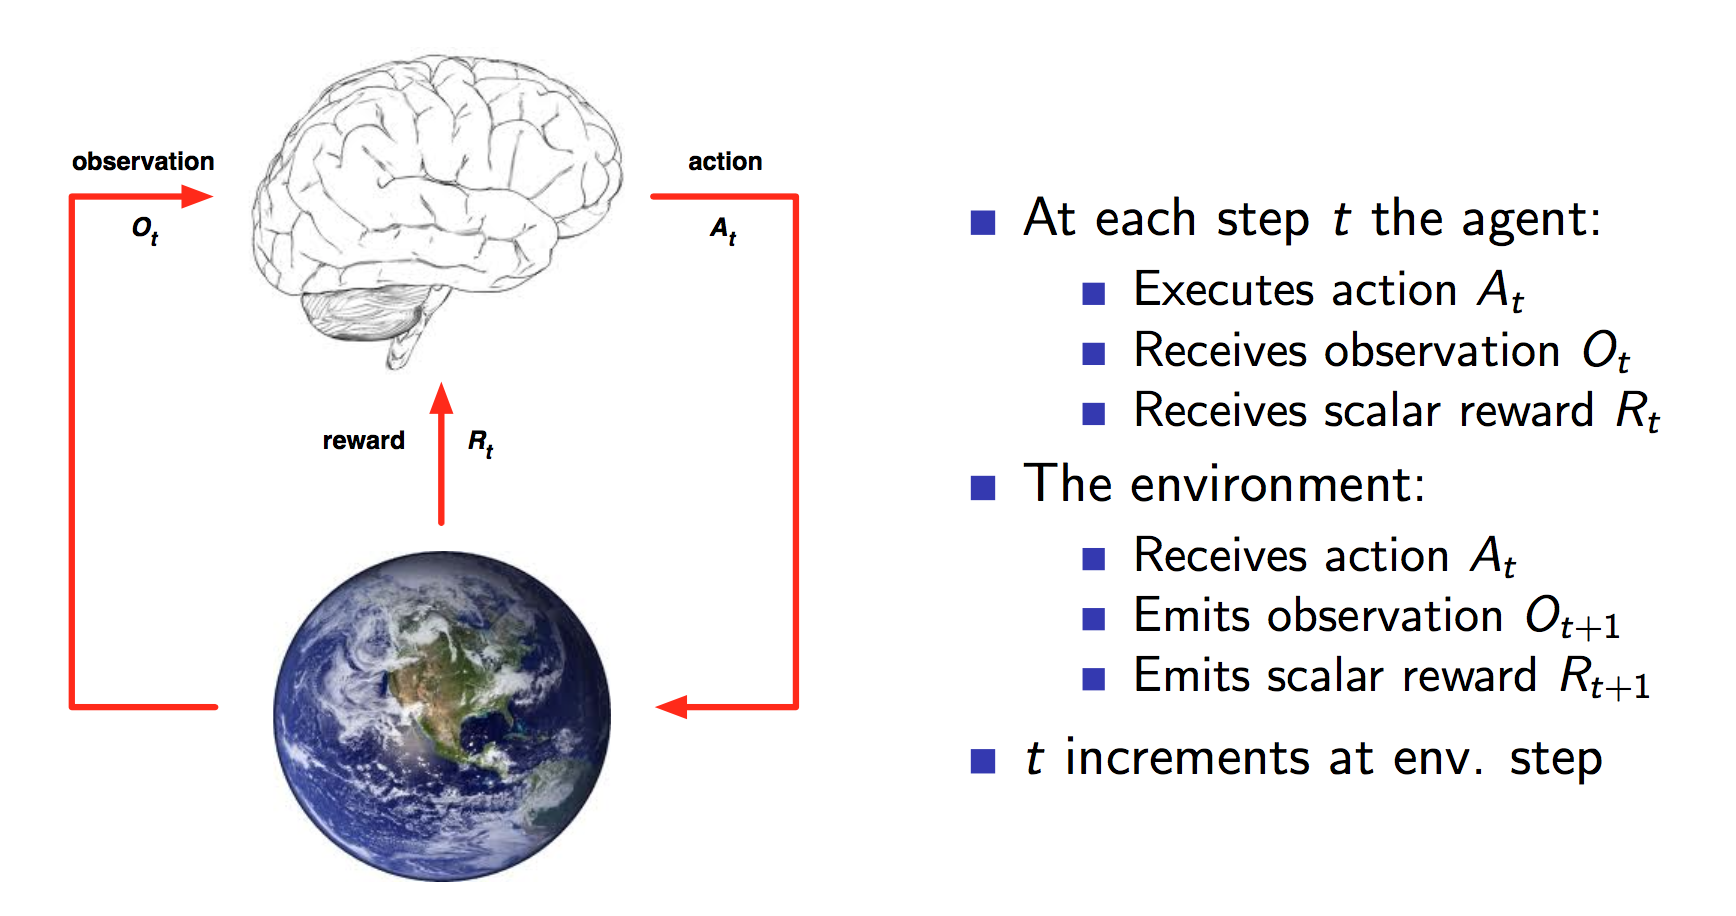

# Historia: es la secuencia de observaciones, Recompenzas y Acciones hasta el momento actual

$\huge H_t = O_1, R_1, A_1, ..., A_{t-1}, O_t, R_t$

# STATE: Es una función de la historia

$\huge S_t = f(H_t)$

Es lo que se usa para determinar que será lo proximo que ocurrira

El Agente tiene su propia representación del estado del entorno (environmient)

# Markov Desision Process (MDP)

$\huge P[S_{t+1}|S_t] = P[S_{t+1}|S_1, S_2, ..., S_t]$

Que consideramos como estado?

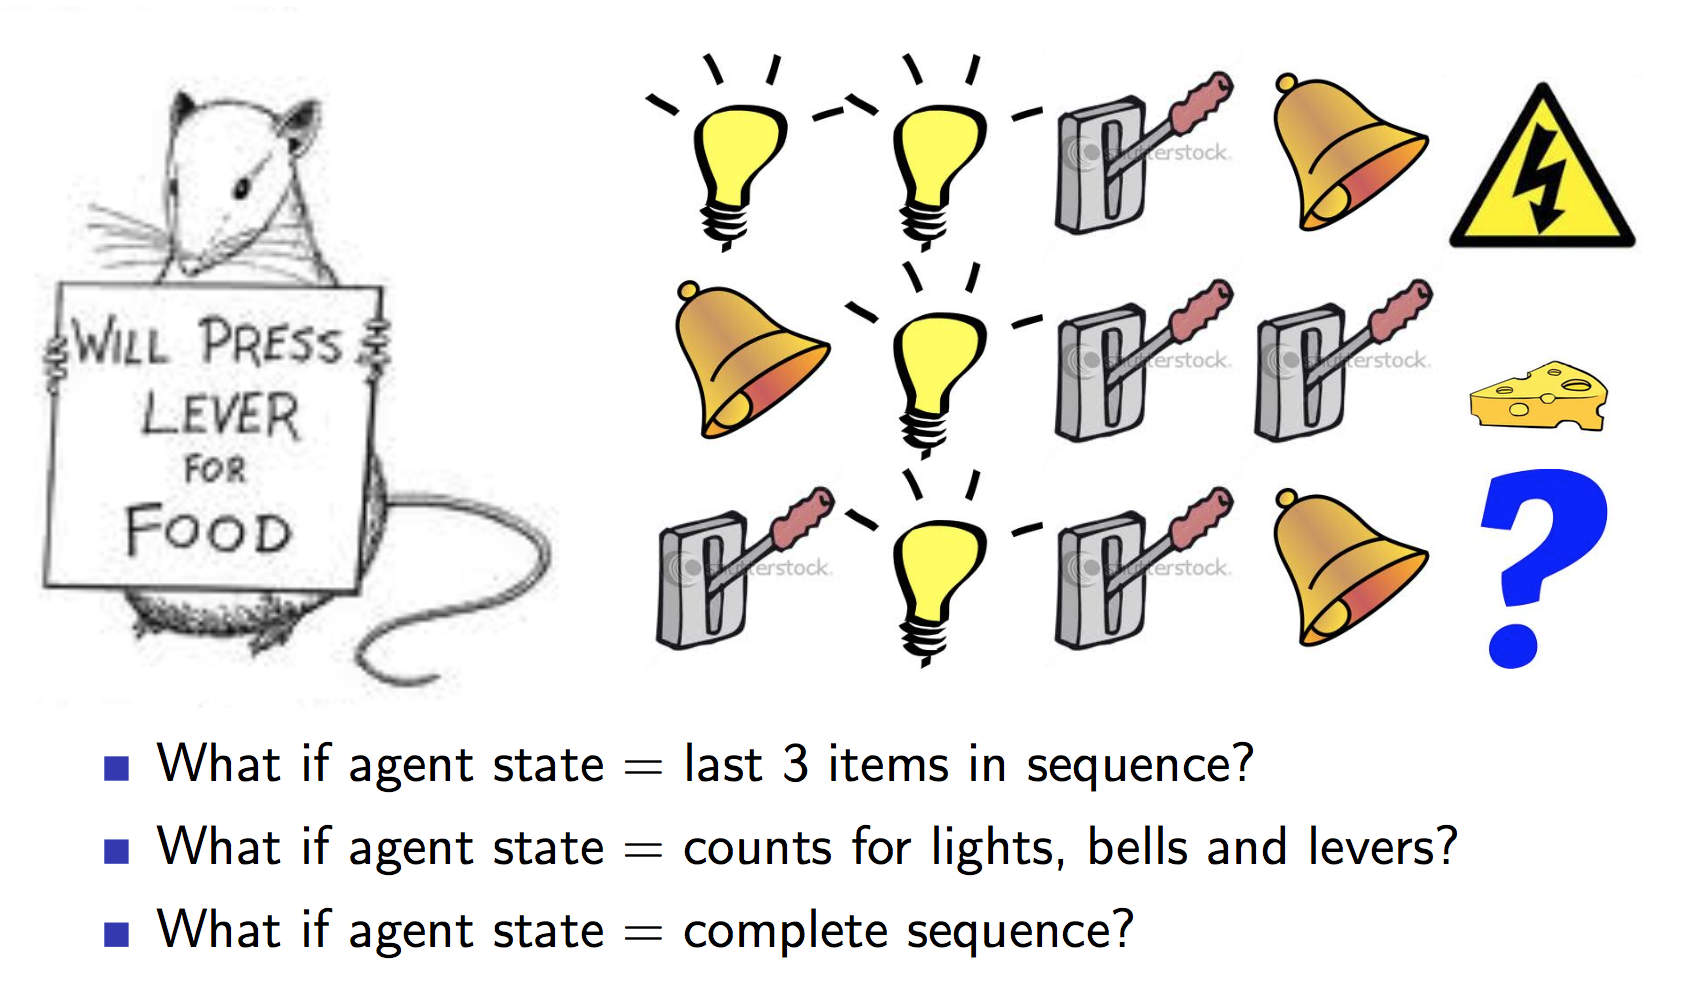

# El agente construye su propia representación:
- Historia completa
- Un red recurrente
- Combinadciones de los estados

# Componentes de un Agente en RL
Nuestra meta es construir el agente que pueda tomar las decisiones

- Policy: Como debe comportarse el Agente
- Value Function: Que tan bueno es cada estado
- Q Funcrion: Que tan bueno es cada estada con cada accion
- Modelo: Representación del entorno

# Policy

Deterministica:

$\huge a=\pi(s)$

Estocastica:

$\huge \pi(a|s) = P[A_t=a|S_t=s]$

Normalmente usamos la deterministica

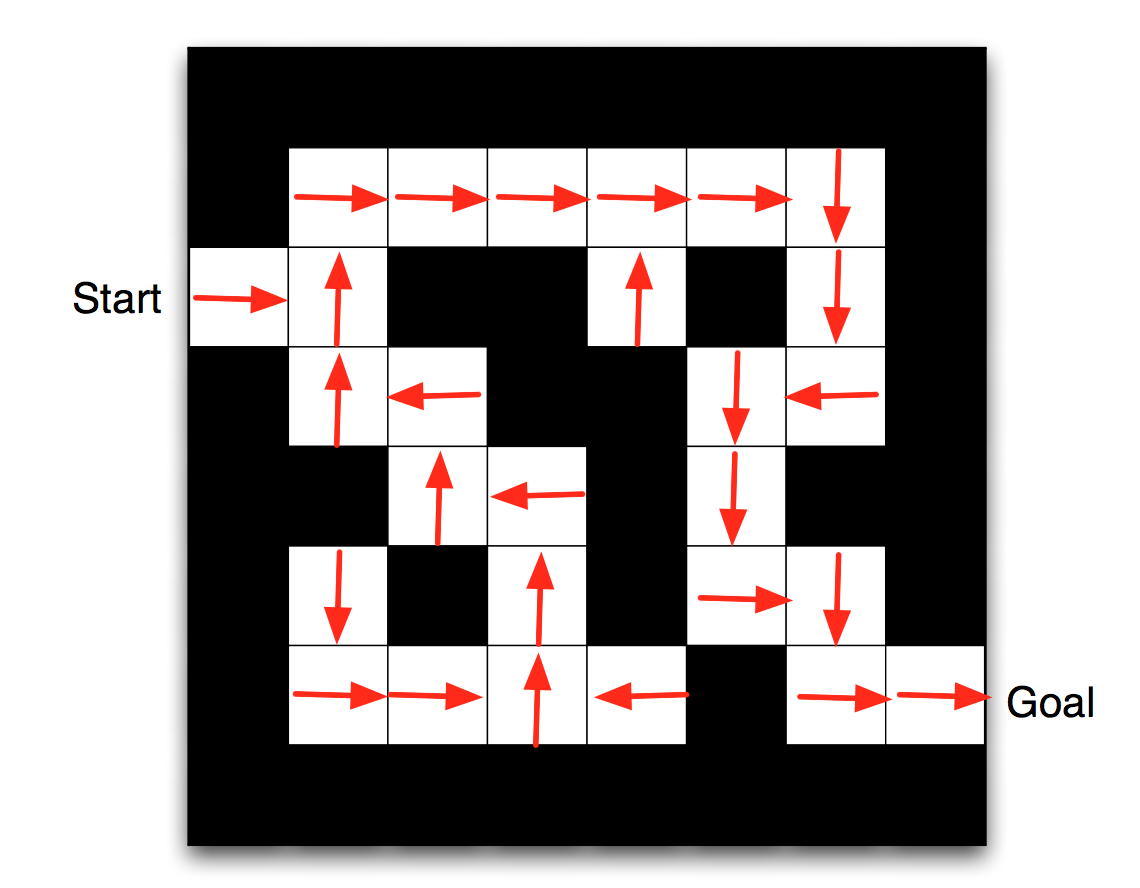

# Value Function (Bellman Equation)
- Predicción de la recompenza futura partiendo del estado **s**
- Evalua que tan bueno es un estado
- Permite tomar decisiones
- **No** es lo mismo que la recompenza en un estado

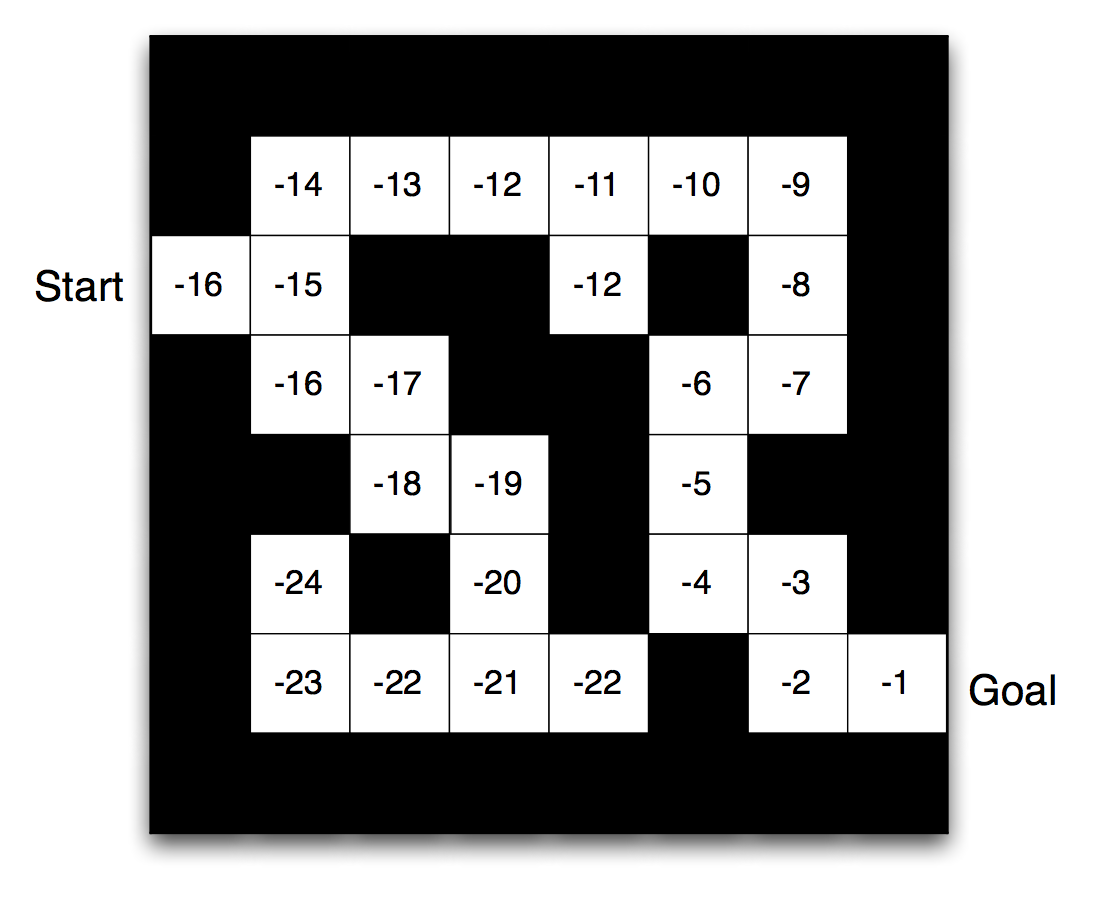

$\huge v_{\pi}(s) = E_{\pi}[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...|S_t = s]$

El subindice $\pi$ indica que es para una policy particular

La esperanza es debido al caracter aleatorio. Por ejemplo, cuando tomo una decisión, el proximo estado puede ser aleatorio.

$\huge v_{\pi}(s) = E_{\pi}[R_{t+1}+\gamma v_{\pi}(s_{t+1})|S_t = s]$

# Action Value Function

$\huge q_{\pi}(s, a) = E_{\pi}[R_{t+1}+\gamma q_{\pi}(s_{t+1}, a_{t+1})|S_t = s, A_t=a]$

$\huge v_{\pi}(s) = \sum_a \pi(a|s)q_{\pi}(s,a)$

# Objetivo encontrar la política $\pi$ que maximize la Value Function Q

Si puedo encontrar Q luego solo tengo que hacer:

$\huge \pi(s) = argmax_{a} q(s,a)$

# Metodo iterativo:

$\huge \hat{q}(s_t,a) = R +\gamma max_a[q(s_{t+1},a)]$

error:

$\huge e = \hat q(s_t,a) - q(s_t,a)$

Minimizar error cuadratico

$\huge q(s_t,a) = q(s_t,a)+\alpha e$

donde $\alpha$ es el learning rate 

# Model

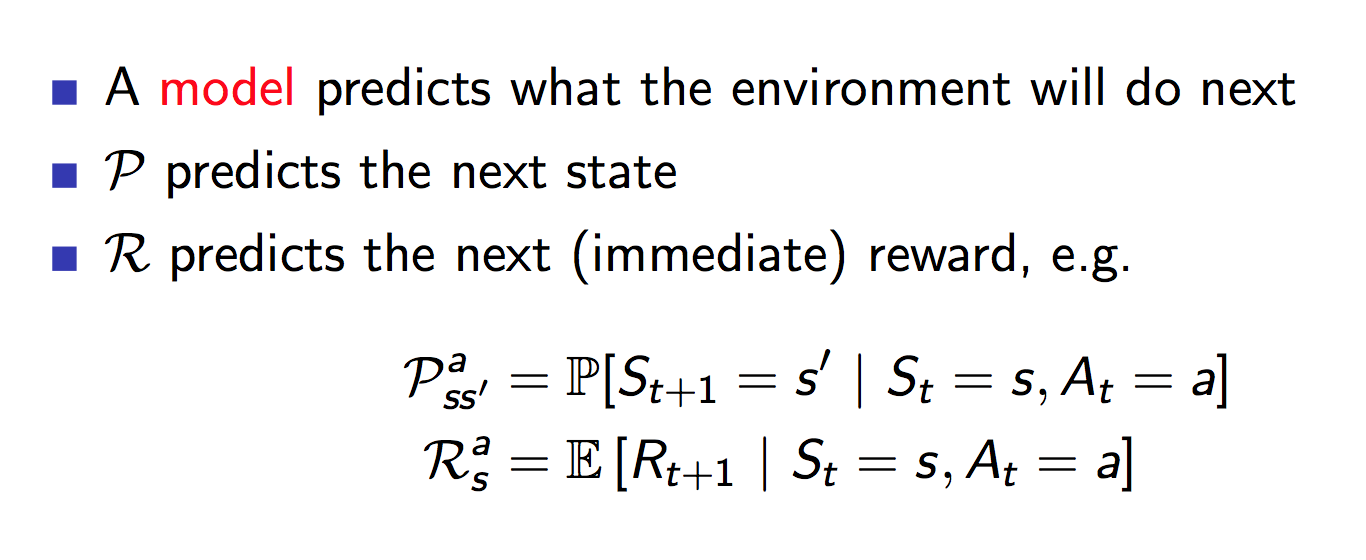